<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/Bike_Rental_Count_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Project Name: Bike Rental Count Prediction uisng ML and H2O Auto ML

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df= pd.read_csv("/content/day.csv")

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.shape

(731, 16)

In [ ]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
### Let us rename the colums for a better understanding

In [ ]:
df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [ ]:
df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
### Let us convert our Data types of variables to the significant category

In [ ]:
df['datetime']=pd.to_datetime(df.datetime)
df['season']=df.season.astype('category')
df['year']=df.year.astype('category')
df['month']=df.month.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weather_condition']=df.weather_condition.astype('category')

In [ ]:
df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
holiday                    category
weekday                    category
workingday                 category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

In [ ]:
df.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df.isnull().sum()


rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [ ]:
### Let us see how the different months and seasons affect the rental counts

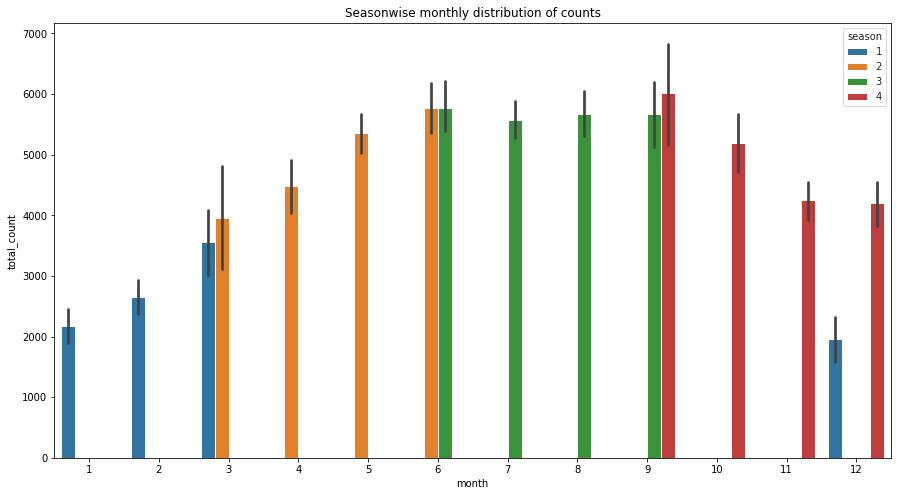

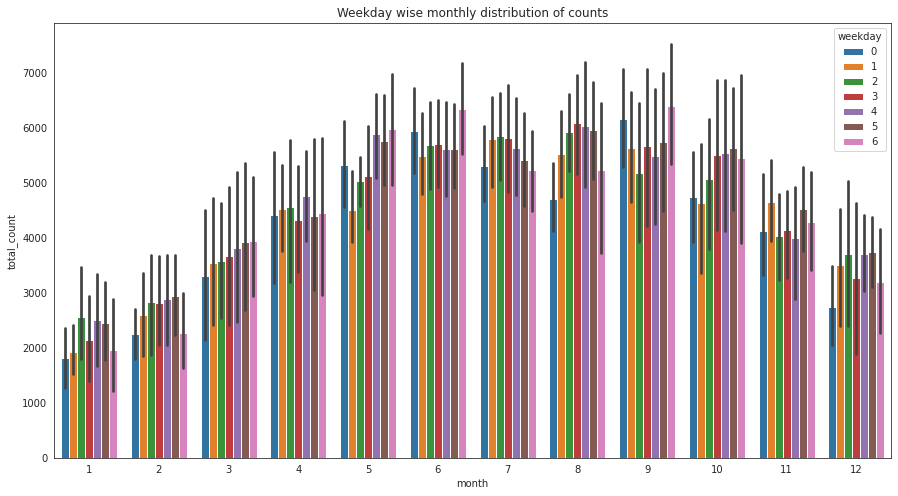

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=df[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

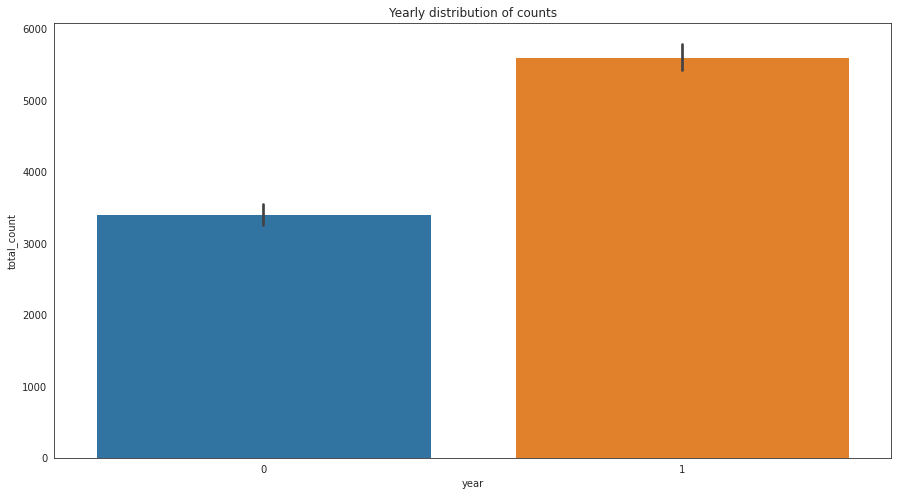

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.barplot(x='year',y='total_count',data=df[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

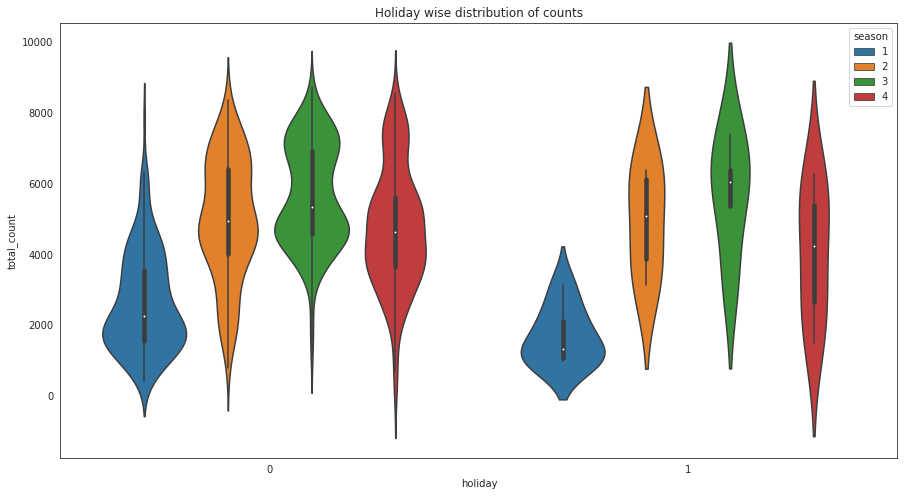

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.violinplot(data=df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()


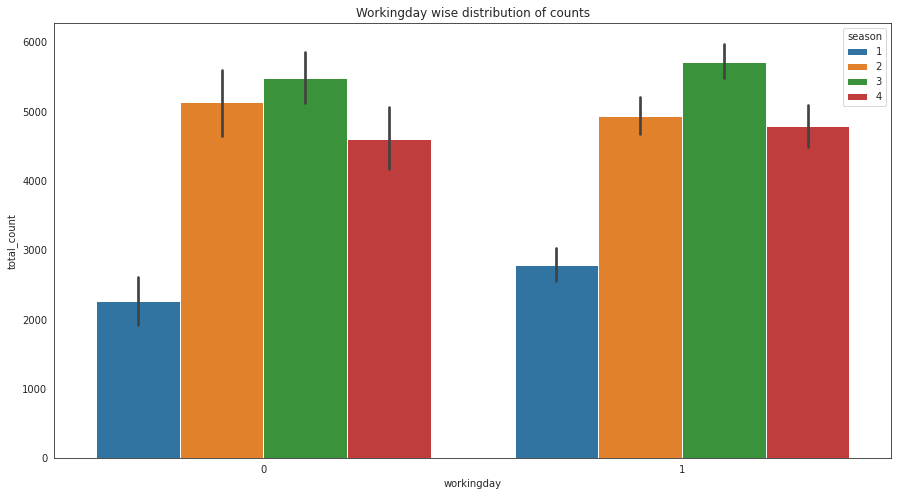

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=df,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

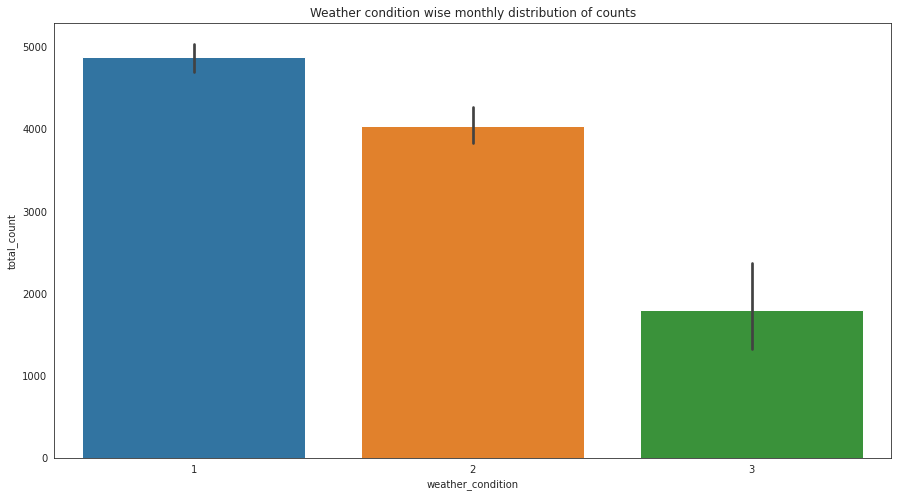

In [ ]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=df[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather condition wise monthly distribution of counts')
plt.show()

In [ ]:
### Outlier Analysis

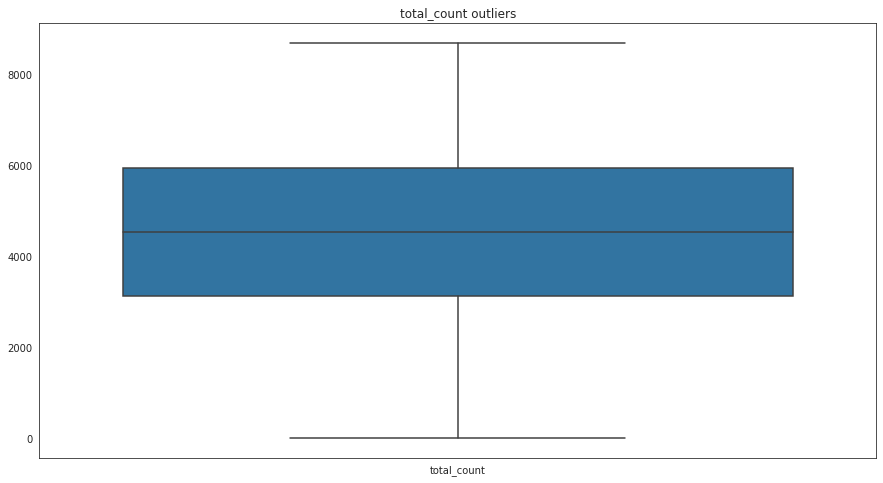

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=df[['total_count']])
ax.set_title('total_count outliers')
plt.show()

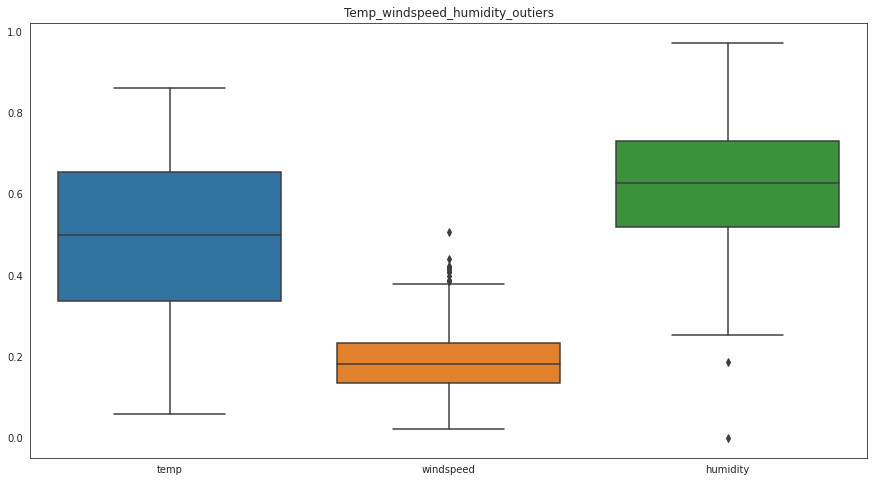

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=df[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

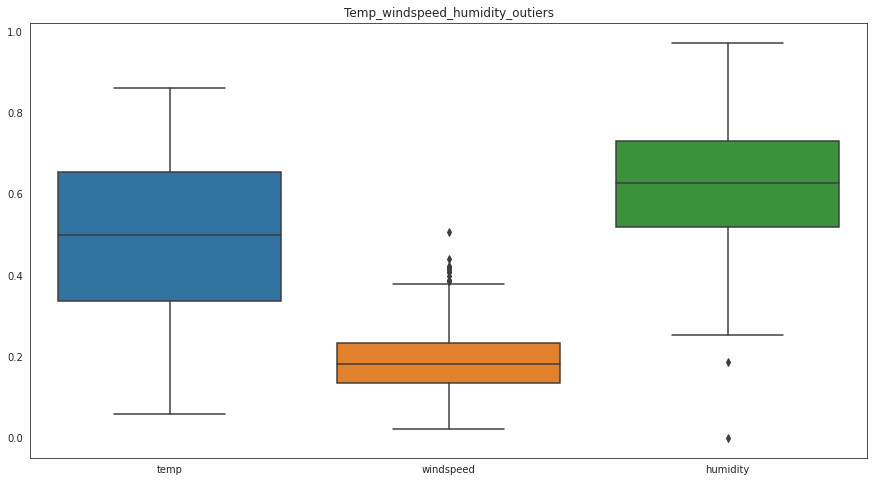

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=df[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()


In [ ]:
### Plotting Q-Q Plot

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

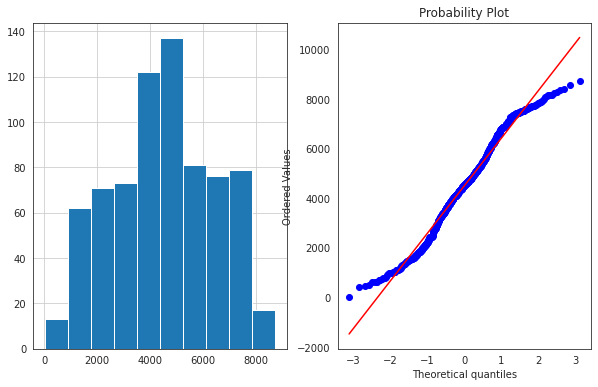

In [ ]:
plot_curve(df,'total_count')

In [ ]:
### Co Relation Matrix



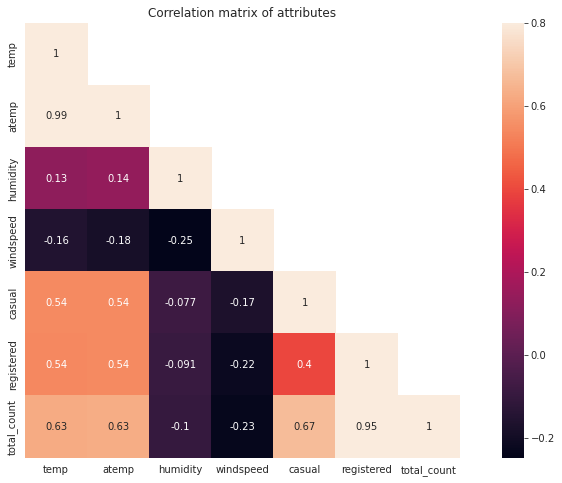

In [ ]:
correMtr=df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

In [ ]:
### Data Pre Processing

In [ ]:
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

In [ ]:
### One Hot Encoding

In [ ]:
encoded_df =pd.get_dummies(df,columns=cat_attributes)
print('Shape of transfomed dataframe::',encoded_df.shape)
encoded_df.head()

Shape of transfomed dataframe:: (731, 24)


,rec_id,datetime,month,weekday,temp,atemp,humidity,windspeed,casual,registered,...,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,1,2011-01-01,1,6,0.344167,0.363625,0.805833,0.160446,331,654,...,0,1,0,1,0,0,1,0,1,0
1,2,2011-01-02,1,0,0.363478,0.353739,0.696087,0.248539,131,670,...,0,1,0,1,0,0,1,0,1,0
2,3,2011-01-03,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,...,0,1,0,0,1,1,0,0,1,0
3,4,2011-01-04,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,...,0,1,0,0,1,1,0,0,1,0
4,5,2011-01-05,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,...,0,1,0,0,1,1,0,0,1,0


In [40]:

encoded_df=encoded_df.drop('datetime',axis=1)

In [41]:
encoded_df

,rec_id,month,weekday,temp,atemp,humidity,windspeed,casual,registered,total_count,...,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,1,1,6,0.344167,0.363625,0.805833,0.160446,331,654,985,...,0,1,0,1,0,0,1,0,1,0
1,2,1,0,0.363478,0.353739,0.696087,0.248539,131,670,801,...,0,1,0,1,0,0,1,0,1,0
2,3,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,...,0,1,0,0,1,1,0,0,1,0
3,4,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,1562,...,0,1,0,0,1,1,0,0,1,0
4,5,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,1600,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12,4,0.254167,0.226642,0.652917,0.350133,247,1867,2114,...,0,1,0,0,1,0,1,0,0,1
727,728,12,5,0.253333,0.255046,0.590000,0.155471,644,2451,3095,...,0,1,0,0,1,0,1,0,0,1
728,729,12,6,0.253333,0.242400,0.752917,0.124383,159,1182,1341,...,0,1,0,1,0,0,1,0,0,1
729,730,12,0,0.255833,0.231700,0.483333,0.350754,364,1432,1796,...,0,1,0,1,0,1,0,0,0,1


In [42]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [43]:
x= encoded_df.iloc[:,0:-1] ## Independent Features
y= encoded_df.iloc[:,-1] ## Dependent Varibales

In [44]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)


In [46]:
from sklearn.linear_model import LinearRegression


In [47]:
linreg= LinearRegression()

In [48]:
linreg.fit(X_train,y_train)

LinearRegression()

In [49]:
pred= linreg.predict(X_test)

In [50]:
lr=linreg.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',linreg.coef_)
print('Model intercept value :',linreg.intercept_)

Accuracy of the model : 1.0
Model coefficients : [-1.12117637e-17  3.39897381e-17 -2.25730162e-16  8.09835188e-15
 -1.31158073e-14  6.20920357e-16  9.12747923e-16  2.23160141e-13
  2.23157980e-13 -2.23157424e-13 -2.40897929e-16 -1.58325936e-16
 -2.03674499e-16 -9.88591684e-17  8.42405016e-19 -1.15334154e-16
  8.18794063e-16  8.60666115e-16 -9.02084042e-16 -8.06952154e-16
 -9.06407996e-16 -1.00000000e+00]
Model intercept value : 1.000000000000002


In [51]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 2.091927591976171e-15
Mean absolute error : 1.7147899262164918e-15


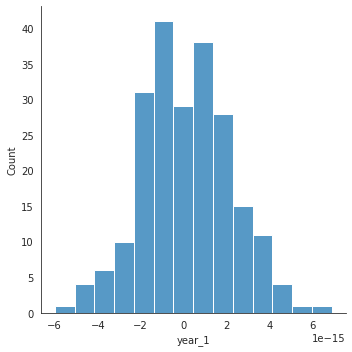

In [52]:
sns.displot(y_test-pred)

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf=RandomForestRegressor(n_estimators=200)

In [56]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [57]:
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9997715040650407


In [58]:
rf_pred=rf.predict(X_test)

In [59]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 0.0034542463985387903
Mean absolute error : 0.00029545454545454574


In [60]:
### H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms, including gradient boosted machines, generalized linear models, deep learning, and many more.

In [61]:
### Installing H2O Auto ML

In [62]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.1 MB 23 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128127 sha256=0e77861144f0624c900a24fb3f3ec43de78f7a106469dcc73dc41d63d195cd2b
  Stored in directory: /root/.cache/pip/wheels/02/f9/18/5fbae4db903beda26f764b6e035cb41b37713fed8a6b9cd403
Successfully built h2o


In [65]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpoykgojso
  JVM stdout: /tmp/tmpoykgojso/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpoykgojso/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_qej7mk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [66]:
df=h2o.import_file("/content/day.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [67]:
df.head()


instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01 00:00:00,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02 00:00:00,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03 00:00:00,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04 00:00:00,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05 00:00:00,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,2011-01-06 00:00:00,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,2011-01-07 00:00:00,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
8,2011-01-08 00:00:00,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
9,2011-01-09 00:00:00,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
10,2011-01-10 00:00:00,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [68]:
## H2O auto ml can do all the data preprocessing techniques


In [69]:
df_train,df_test= df.split_frame(ratios=[.8])

In [70]:
y = "cnt"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('casual')
x.remove('registered')

In [71]:
### Defining the model

In [72]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

In [73]:
### Fitting the model


In [74]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
16:08:51.208: Project: AutoML_1_20220809_160851
16:08:51.210: Setting stopping tolerance adaptively based on the training frame: 0.04177559931443568
16:08:51.218: Build control seed: 10
16:08:51.221: training frame: Frame key: AutoML_1_20220809_160851_training_py_3_sid_8dbd    cols: 16    rows: 573  chunks: 1    size: 21964  checksum: 3179336763973633822
16:08:51.222: validation frame: NULL
16:08:51.222: leaderboard frame: NULL
16:08:51.222: blending frame: NULL
16:08:51.224: response column: cnt
16:08:51.226: fold column: null
16:08:51.233: weights column: null
16:08:51.296: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_2 (5g

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,4.073856e+02,3.839431e+00,4.101005e+02,4.046707e+02
1,mean_residual_deviance,3.720944e+05,7.155705e+04,4.226928e+05,3.214959e+05
2,mse,3.720944e+05,7.155705e+04,4.226928e+05,3.214959e+05
3,null_deviance,1.066438e+09,1.834364e+08,1.196147e+09,9.367284e+08
4,r2,8.998111e-01,2.744285e-03,8.978706e-01,9.017516e-01
5,residual_deviance,1.066809e+08,2.129043e+07,1.217355e+08,9.162633e+07
6,rmse,6.085772e+02,5.879045e+01,6.501483e+02,5.670061e+02
7,rmsle,2.866669e-01,1.325003e-01,3.803588e-01,1.929751e-01


In [75]:
lb = aml.leaderboard

In [76]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20220809_160851,610.232,372383,407.736,0.302254,372383
StackedEnsemble_BestOfFamily_1_AutoML_1_20220809_160851,617.65,381492,417.165,0.30547,381492
GBM_3_AutoML_1_20220809_160851,633.614,401467,430.596,0.305658,401467
GBM_4_AutoML_1_20220809_160851,634.742,402897,429.682,0.307578,402897
GBM_2_AutoML_1_20220809_160851,642.877,413291,437.764,0.305993,413291
DRF_1_AutoML_1_20220809_160851,653.655,427265,438.492,0.32374,427265
XGBoost_3_AutoML_1_20220809_160851,657.035,431695,455.614,0.30083,431695
XGBoost_2_AutoML_1_20220809_160851,671.943,451507,466.113,0.305023,451507
XRT_1_AutoML_1_20220809_160851,673.276,453300,469.042,0.322909,453300
XGBoost_1_AutoML_1_20220809_160851,686.103,470738,489.094,0.314596,470738


In [77]:
## Getting all the model ids

In [78]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [79]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20220809_160851',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20220809_160851',
 'GBM_3_AutoML_1_20220809_160851',
 'GBM_4_AutoML_1_20220809_160851',
 'GBM_2_AutoML_1_20220809_160851',
 'DRF_1_AutoML_1_20220809_160851',
 'XGBoost_3_AutoML_1_20220809_160851',
 'XGBoost_2_AutoML_1_20220809_160851',
 'XRT_1_AutoML_1_20220809_160851',
 'XGBoost_1_AutoML_1_20220809_160851',
 'GBM_1_AutoML_1_20220809_160851',
 'GLM_1_AutoML_1_20220809_160851']

In [80]:
aml.leader.model_performance(df_test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 425263.3469181007
RMSE: 652.1221871076775
MAE: 451.8869033295657
RMSLE: 0.22768806355862276
R^2: 0.8903080371736536
Mean Residual Deviance: 425263.3469181007
Null degrees of freedom: 157
Residual degrees of freedom: 150
Null deviance: 612981066.4612508
Residual deviance: 67191608.81305991
AIC: 2514.1378720316634


In [81]:
### Getting the model details for best performing model

In [82]:

h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220809_160851

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 39228.65649282106
RMSE: 198.06225408396486
MAE: 137.95075961440986
RMSLE: 0.18337479679996024
R^2: 0.9894303047538314
Mean Residual Deviance: 39228.65649282106
Null degrees of freedom: 572
Residual degrees of freedom: 565
Null deviance: 2126647897.3019185
Residual deviance: 22478020.170386467
AIC: 7704.817838687616

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 372383.4674265673
RMSE: 610.2323061151116
MAE: 407.73605885432323
RMSLE: 0.3022537940700767
R^2: 0.8996657006051011
Mean Residual Deviance: 372383.4674265673
Null degrees of freedom: 572
Residual degrees of freedom: 565
Null deviance: 2132874952.2173402
Residual deviance: 213375726.83542305
AIC: 8994.36387171718

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid
0,mae,4.073856e+02,3.839431e+00,4.101005e+02,4.046707e+02
1,mean_residual_deviance,3.720944e+05,7.155705e+04,4.226928e+05,3.214959e+05
2,mse,3.720944e+05,7.155705e+04,4.226928e+05,3.214959e+05
3,null_deviance,1.066438e+09,1.834364e+08,1.196147e+09,9.367284e+08
4,r2,8.998111e-01,2.744285e-03,8.978706e-01,9.017516e-01
5,residual_deviance,1.066809e+08,2.129043e+07,1.217355e+08,9.162633e+07
6,rmse,6.085772e+02,5.879045e+01,6.501483e+02,5.670061e+02
7,rmsle,2.866669e-01,1.325003e-01,3.803588e-01,1.929751e-01


In [83]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'base_models': {'actual': [{'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_3_AutoML_1_20220809_160851',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_4_AutoML_1_20220809_160851',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_2_AutoML_1_20220809_160851',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'DRF_1_AutoML_1_20220809_160851',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XGBoost_3_AutoML

In [84]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220809_160851

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 39228.65649282106
RMSE: 198.06225408396486
MAE: 137.95075961440986
RMSLE: 0.18337479679996024
R^2: 0.9894303047538314
Mean Residual Deviance: 39228.65649282106
Null degrees of freedom: 572
Residual degrees of freedom: 565
Null deviance: 2126647897.3019185
Residual deviance: 22478020.170386467
AIC: 7704.817838687616

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 372383.4674265673
RMSE: 610.2323061151116
MAE: 407.73605885432323
RMSLE: 0.3022537940700767
R^2: 0.8996657006051011
Mean Residual Deviance: 372383.4674265673
Null degrees of freedom: 572
Residual degrees of freedom: 565
Null deviance: 2132874952.2173402
Residual deviance: 213375726.83542305
AIC: 8994.36387171718

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid
0,mae,4.073856e+02,3.839431e+00,4.101005e+02,4.046707e+02
1,mean_residual_deviance,3.720944e+05,7.155705e+04,4.226928e+05,3.214959e+05
2,mse,3.720944e+05,7.155705e+04,4.226928e+05,3.214959e+05
3,null_deviance,1.066438e+09,1.834364e+08,1.196147e+09,9.367284e+08
4,r2,8.998111e-01,2.744285e-03,8.978706e-01,9.017516e-01
5,residual_deviance,1.066809e+08,2.129043e+07,1.217355e+08,9.162633e+07
6,rmse,6.085772e+02,5.879045e+01,6.501483e+02,5.670061e+02
7,rmsle,2.866669e-01,1.325003e-01,3.803588e-01,1.929751e-01


In [85]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [86]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [87]:
y_pred

predict
1107.05
1173.04
1275.56
1217.24
994.824
1598.14
1382.44
1463.64
1545.21
1818.98
